In [1]:
import pickle # convert data in binary form to other
import numpy as np
import pandas as pd

In [2]:
with open('../input/train-qatxt/train_qa.txt','rb')as f:
  train_data=pickle.load(f)

In [3]:
type(train_data)

list

In [4]:
with open('../input/train-qatxt/train_qa.txt','rb')as f:
  test_data=pickle.load(f)

In [5]:
type(test_data)

list

In [6]:
print(train_data,test_data)
len(train_data)

[(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'], ['Is', 'Sandra', 'in', 'the', 'hallway', '?'], 'no'), (['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.', 'Mary', 'went', 'back', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.'], ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'], 'no'), (['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.', 'Mary', 'went', 'back', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.', 'Sandra', 'went', 'to', 'the', 'kitchen', '.', 'Daniel', 'went', 'back', 'to', 'the', 'bathroom', '.'], ['Is', 'Daniel', 'in', 'the', 'office', '?'], 'no'), (['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.', 'Mary', 'went', 'back', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.', 'Sa

10000

In [7]:
len(test_data)

10000

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
' '.join(train_data[0][0]) #Story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1]) #question

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2] #answer

'no'

- First we need to create a vocabulary with our data
- For this we will use the training data only to - On the video it uses both
- train and test 
- Might have to use training and test later, as the dataset has very
- few words

In [12]:
all_data=test_data+train_data

In [13]:
all_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [14]:
#First we will build a set of all the words in the dataset:
vocab=set()
for story,question,answer in all_data:
  vocab=vocab.union(set(story))
  vocab=vocab.union(set(question))
  # vocab=vocab.union(set(answer)) we add another vocab no and yes seperate if we delete that union part
#Set returns unique words in the sentence
#Union returns the unique common elements from a two sets

In [15]:
 vocab.add('no')
 vocab.add('yes')

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
#Calculate len and add 1 for Keras placeholder - Placeholders are used to feed in the data to the network. 
#They need a data type, and have optional shape arguements.
#They will be empty at first, and then the data will get fed into the placeholder
vocab_len = len(vocab) + 1

In [18]:
vocab_len

38

In [19]:
len(all_data[0][0])

12

In [20]:
all_stories_lens=[len(data[0])for data in all_data]

In [21]:
len(all_stories_lens)

20000

In [22]:
#print the length of each story in all _data
max_story_len=max(all_stories_lens)

In [23]:
all_question_lens=[len(data[1])for data in all_data]

In [24]:
max_question_len=max(all_question_lens)
max_question_len

6

In [25]:
# Vectorizing the data
import tensorflow
import tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
#Create an instance of the tokenizer object:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [27]:
#Dictionary that maps every word in our vocab to an index
# It has been automatically lowercased
#This tokenizer can give different indexes for different words depending on when we run it
tokenizer.word_index

{'put': 1,
 'apple': 2,
 'kitchen': 3,
 'office': 4,
 'up': 5,
 'the': 6,
 'is': 7,
 'got': 8,
 '?': 9,
 'moved': 10,
 'to': 11,
 'john': 12,
 'hallway': 13,
 'down': 14,
 'bathroom': 15,
 'yes': 16,
 'no': 17,
 'in': 18,
 'there': 19,
 'bedroom': 20,
 'football': 21,
 'garden': 22,
 'picked': 23,
 'sandra': 24,
 'went': 25,
 'travelled': 26,
 'discarded': 27,
 'mary': 28,
 'grabbed': 29,
 'dropped': 30,
 'daniel': 31,
 'left': 32,
 '.': 33,
 'journeyed': 34,
 'milk': 35,
 'took': 36,
 'back': 37}

In [28]:
#Tokenize the stories, questions and answers:
train_story_text = []
train_question_text = []
train_answers = []

#Separating each of the elements
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question) 
    train_answers.append(answer)

In [29]:
#Coverting the text into the indexes 
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [30]:
#Create a function for vectorizing the stories, questions and answers:
def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
      #vectorized stories:
    X = []
    #vectorized questions:
    Xq = []
    #vectorized answers:
    Y = []

    for story, question, answer in data:
        #Getting indexes for each word in the story
        x = [word_index[word.lower()] for word in story]
        #Getting indexes for each word in the story
        xq = [word_index[word.lower()] for word in question]
        #For the answers
        y = np.zeros(len(word_index) + 1) #Index 0 Reserved when padding the sequences
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Now we have to pad these sequences:
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))


In [31]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [32]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [33]:
inputs_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 28, 10, 11,  6, 15, 33, 24, 34, 11,
        6, 20, 33], dtype=int32)

In [34]:
tokenizer.word_index['yes']

16

In [35]:
tokenizer.word_index['no']

17

In [36]:
sum(answers_test)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0., 5012., 4988.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [37]:
answers_test[30:38]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0.,

In [38]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [39]:
train_story_seq[0]

[28, 10, 11, 6, 15, 33, 24, 34, 11, 6, 20, 33]

## 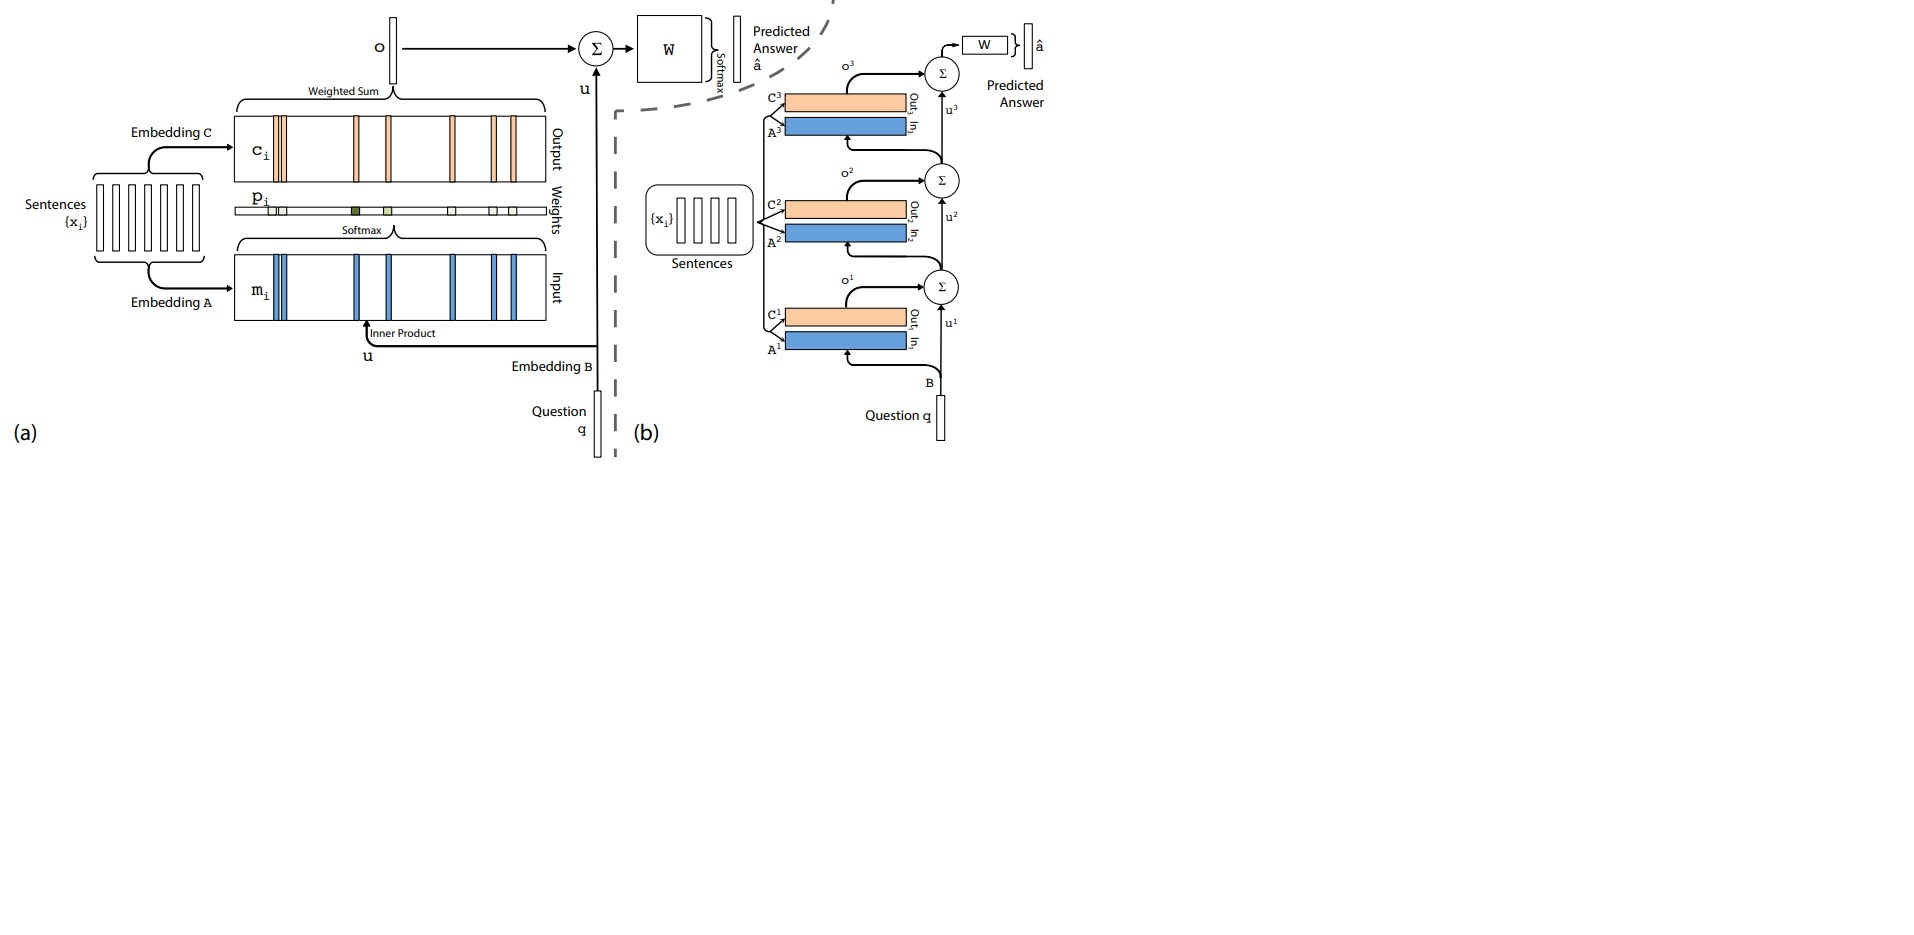

In [40]:
#Building the Network

#Imports
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [41]:
# We need to create the placeholders 
#The Input function is used to create a keras tensor
#PLACEHOLDER shape = (max_story_len,batch_size)
#These are our placeholder for the inputs, ready to recieve batches of the stories and the questions
input_sequence = Input((max_story_len,)) #As we dont know batch size yet
question = Input((max_question_len,))

In [42]:
#Create input encoder M:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim) -- Gives a list of the lenght of the samples where each item has the
#lenght of the max story lenght and every word is embedded in the embbeding dimension


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [43]:
#Create input encoder C:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [44]:
#Create question encoder:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [45]:
#Now lets encode the sequences, passing the placeholders into our encoders:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [46]:
#Use dot product to compute similarity between input encoded m and question 
#Like in the paper:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [47]:
#For the response we want to add this match with the ouput of input_encoded_c
response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensions of input

In [48]:
#Once we have the response we can concatenate it with the question encoded:
answer = concatenate([response, question_encoded])

answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [49]:
# Reduce the answer tensor with a RNN (LSTM)
answer = LSTM(32)(answer)

In [50]:
#Regularization with dropout:
answer = Dropout(0.5)(answer)
#Output layer:
answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes or no and all 0s

In [51]:
#Now we need to output a probability distribution for the vocab, using softmax:
answer = Activation('softmax')(answer)

In [52]:
#Now we build the final model:
model = Model([input_sequence,question], answer)

In [53]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Categorical instead of binary cross entropy as because of the way we are training
#we could actually see any of the words from the vocab as output
#however, we should only see yes or no

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [55]:
history = model.fit([inputs_train,questions_train],answers_train, batch_size = 5, epochs = 10, validation_data = ([inputs_test,questions_test],answers_test))

2022-01-04 15:32:03.470568: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
2000/2000 [==============================] - 20s 9ms/step - loss: 0.7580 - accuracy: 0.4885 - val_loss: 0.6948 - val_accuracy: 0.4988
Epoch 2/10
2000/2000 [==============================] - 17s 8ms/step - loss: 0.6963 - accuracy: 0.5065 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 3/10
2000/2000 [==============================] - 16s 8ms/step - loss: 0.6959 - accuracy: 0.5024 - val_loss: 0.6939 - val_accuracy: 0.4988
Epoch 4/10
2000/2000 [==============================] - 17s 8ms/step - loss: 0.6952 - accuracy: 0.4985 - val_loss: 0.6929 - val_accuracy: 0.5117
Epoch 5/10
2000/2000 [==============================] - 16s 8ms/step - loss: 0.6958 - accuracy: 0.4961 - val_loss: 0.6928 - val_accuracy: 0.5009
Epoch 6/10
2000/2000 [==============================] - 17s 9ms/step - loss: 0.6937 - accuracy: 0.5163 - val_loss: 0.6838 - val_accuracy: 0.5639
Epoch 7/10
2000/2000 [==============================] - 17s 8ms/step - loss: 0.6465 - accuracy: 0.6234 - val_loss: 0.5570 - val_ac

In [56]:
filename = 'Z_chatbot_100_epochs.h5'
model.save(filename)

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


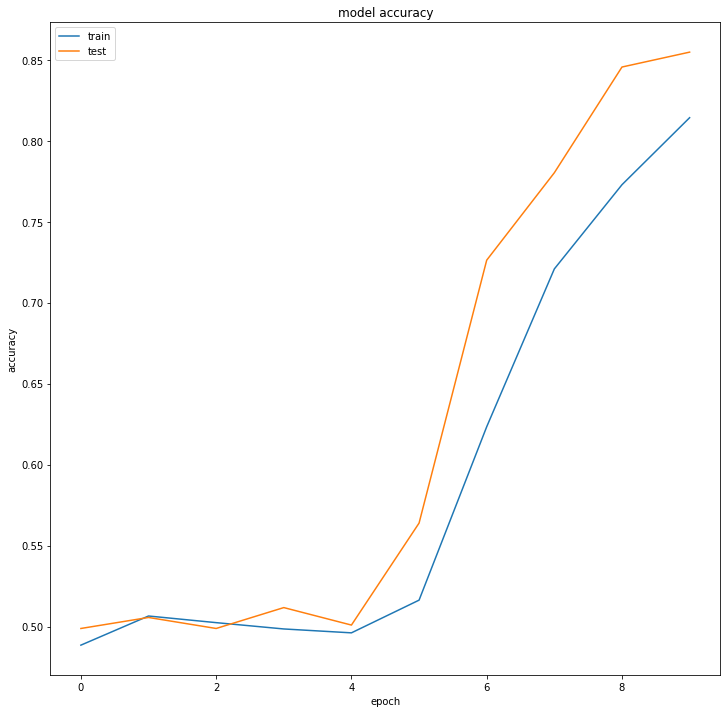

In [57]:
#Lets plot the increase of accuracy as we increase the number of training epochs
#We can see that without any training the acc is about 50%, random guessing
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
#To load a model that we have already trained and saved:
model.load_weights('Z_chatbot_100_epochs.h5')

In [59]:
#Lets check out the predictions on the test set:
#These are just probabilities for every single word on the vocab
pred_results = model.predict(([inputs_test,questions_test]))

In [60]:
#First test data point
test_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [61]:
#These are the probabilities for the vocab words using the 1st sentence
pred_results[0]

array([3.37966178e-12, 2.86275062e-12, 2.74050661e-12, 2.55953440e-12,
       1.99673871e-12, 3.14844917e-12, 2.24251997e-12, 2.02058379e-12,
       2.54953610e-12, 2.23555029e-12, 2.02982357e-12, 3.01766359e-12,
       1.90698108e-12, 3.14436823e-12, 3.51933651e-12, 2.54347455e-12,
       1.36308065e-02, 9.86369133e-01, 1.94523087e-12, 2.41202978e-12,
       2.06093172e-12, 2.97958424e-12, 2.39913688e-12, 3.68289036e-12,
       2.99648826e-12, 3.12461515e-12, 2.10886365e-12, 2.19260352e-12,
       2.36680315e-12, 4.01922332e-12, 2.77593291e-12, 3.02257178e-12,
       2.01073424e-12, 2.09640725e-12, 1.95434966e-12, 2.63215361e-12,
       2.47484997e-12, 3.36475249e-12], dtype=float32)

In [62]:
val_max = np.argmax(pred_results[0])
val_max # max Value for no

17

In [63]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [64]:
#See probability:
pred_results[0][val_max]


0.98636913

In [65]:
#Now, we can make our own questions using the vocabulary we have
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [66]:
my_story = 'Sandra picked up the milk . Mary travelled left . '

In [67]:
my_story.split()

['Sandra',
 'picked',
 'up',
 'the',
 'milk',
 '.',
 'Mary',
 'travelled',
 'left',
 '.']

In [68]:
my_question = 'Sandra got the milk ?'

In [69]:
my_question.split()

['Sandra', 'got', 'the', 'milk', '?']

In [70]:
#Put the data in the same format as before
my_data = [(my_story.split(), my_question.split(),'yes')]

In [71]:
#Vectorize this data
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [72]:
#Make the prediction
pred_results = model.predict(([my_story,my_ques]))

In [73]:
val_max = np.argmax(pred_results[0])

In [74]:
#Correct prediction!
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [75]:
#Confidence
pred_results[0][val_max]

0.56959283